# Проект для интернет магазина

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Импорт-библиотек-и-данных" data-toc-modified-id="Импорт-библиотек-и-данных-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Импорт библиотек и данных</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Анализ-целевого-признака" data-toc-modified-id="Анализ-целевого-признака-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Анализ целевого признака</a></span></li><li><span><a href="#Пайплайн-и-моделирование" data-toc-modified-id="Пайплайн-и-моделирование-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Пайплайн и моделирование</a></span></li></ul></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

Интернет-магазин запускает новый сервис, в котором пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах, клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. Будет обучена модель для классификации комментариев на позитивные и негативные со значением метрики качества *F1* не меньше 0.75. Предоставлен набор данных с разметкой о токсичности правок.

- text - текст комментария,
- toxic - целевой признак.

## Подготовка

#### Импорт библиотек и данных

In [5]:
!ls -lah ..

total 65K
drwsrwsr-x 1 jovyan users 4.0K Nov 14 01:00 .
drwxr-xr-x 1 root   root  4.0K Jul  8  2021 ..
-rw-rw-r-- 1 jovyan users  220 Feb 25  2020 .bash_logout
-rw-rw-r-- 1 jovyan users 3.8K Jul  8  2021 .bashrc
drwsrwsr-x 1 jovyan users 4.0K Nov 14 00:59 .cache
drwsrwsr-x 1 jovyan users 4.0K Jul  8  2021 .conda
drwxr-sr-x 5 jovyan users 4.0K Nov 14 01:00 .ipython
drwsrws--- 2 jovyan users 4.0K Jul  8  2021 .jupyter
drwxr-sr-x 2 jovyan users 4.0K Aug 31  2022 .keras
drwxr-sr-x 1 jovyan users 4.0K Nov 14 00:59 .local
drwxr-sr-x 4 jovyan users 4.0K Aug 31  2022 nltk_data
drwsrwsr-x 2 jovyan users 4.0K Jul  8  2021 .npm
-rw-rw-r-- 1 jovyan users  807 Feb 25  2020 .profile
-rw-rw-r-- 1 jovyan users  227 Jul  8  2021 .wget-hsts
drwxr-xr-x 1 jovyan users    0 Aug  8  2023 work


In [1]:
pip install imbalanced-learn 

     |████████████████████████████████| 258 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 13.4 MB 18.7 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 103.5 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import nltk
import joblib
import numpy as np
from nltk.corpus import stopwords as nltk_stopwords
import pandas as pd
import torch
import transformers
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [3]:
#Import Tokenizer
from nltk.tokenize import RegexpTokenizer
#Import Lemmatizer
from nltk.stem import WordNetLemmatizer

In [4]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [5]:
from nltk.corpus import wordnet

In [6]:
tqdm.pandas()

In [7]:
data = pd.read_csv(r"")

#### Изучение данных

In [8]:
data[data["text"].str.lower().str.contains("п")]["text"]
# Предоставлен англоязычный текст с немногочисленными крмментариями на других языках.
# Основной язык - английский.

126       Ahh, Hello Witzeman \n\n203.92.84.161  \nSymbo...
1900      Hi, 牛岩, and welcome to Wikipedia! I hope you l...
2645      I understand your difficulty. I am able to rea...
6488                        Lol, my major issue P:))  спойт
7628      "\nComment Hi There, In spite all my effort, I...
                                ...                        
146599    To let the he-goat into the kitchen-garden \nT...
148752    "\n\nI appreciate your opinion and that is why...
149481    "\nIt's OK. Moves are performed by clicking on...
155970    "\n\n""Omega and Chaos""\n\nIn a certain mytho...
158411    "* The Russian idiom ""to let the he-goat into...
Name: text, Length: 71, dtype: object

In [9]:
data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


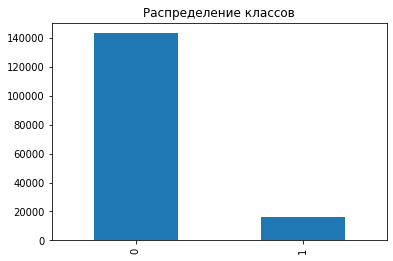

In [10]:
# Классы целевого признака распределены неравномерно, превалирует класс 0 (положительные твиты),
# Однако вычислить надо отрицательные твит, относящиеся к классу 1.
data["toxic"].value_counts().plot(kind="bar")
plt.title("Распределение классов");

In [11]:
# Просмотр орицателньных твитов. Действительно, с ними надо поработать.
data[data["toxic"] == 1]["text"]

6              COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
12        Hey... what is it..\n@ | talk .\nWhat is it......
16        Bye! \n\nDon't look, come or think of comming ...
42        You are gay or antisemmitian? \n\nArchangel WH...
43                 FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!
                                ...                        
159215    "\n\n our previous conversation \n\nyou fuckin...
159235                    YOU ARE A MISCHIEVIOUS PUBIC HAIR
159262    Your absurd edits \n\nYour absurd edits on gre...
159267    "\n\nHey listen don't you ever!!!! Delete my e...
159275    and i'm going to keep posting the stuff u dele...
Name: text, Length: 16186, dtype: object

Итоги:

- данные успешно загружены
- данные на английском языке
- В целовом признаке два класса: 0 - положительные твиты (большинство), 1 - отрицательные твиты (меньшинство).

#### Предобработка данных

In [15]:
# Исключение знаков препинания - один из вариантов
import string
def remove_punctuation(text):
    no_punct=''.join(c for c in text if c not in string.punctuation)
    return no_punct

In [16]:
print('До работы с пунктуацией', data['text'].head(3))

До работы с пунктуацией 0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
Name: text, dtype: object


In [17]:
#  Токенизирование
data['text_no_punct']=data['text'].apply(lambda x: remove_punctuation(x))
print('После работы с пунктуацией', data['text_no_punct'].head(3))

После работы с пунктуацией 0    Explanation\nWhy the edits made under my usern...
1    Daww He matches this background colour Im seem...
2    Hey man Im really not trying to edit war Its j...
Name: text_no_punct, dtype: object


In [18]:
#Токенизирование (убирает и пунктуацию)
tokenizer=RegexpTokenizer(r'\w+')

In [19]:
data['text_token']=data['text'].apply(lambda x: tokenizer.tokenize(x.lower()))
data['text_token'].head(3)

0    [explanation, why, the, edits, made, under, my...
1    [d, aww, he, matches, this, background, colour...
2    [hey, man, i, m, really, not, trying, to, edit...
Name: text_token, dtype: object

In [20]:
# Удаление стоп слов
nltk.download("stopwords")
stopwords = list(set(nltk_stopwords.words("english")))
stopwords[:100:10]

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['at', 'on', 'about', 'itself', 're', 'that', 'i', 'which', 'by', 'her']

In [21]:
def remove_stopwords(text):
    words=[w for w in text if w not in stopwords]
    return words

In [22]:
type(data['text_token'])

pandas.core.series.Series

In [23]:
data['text_token_stopwords']=data['text_token'].progress_apply(lambda x: remove_stopwords(x))
data['text_token_stopwords'].head()

100%|██████████| 159292/159292 [00:19<00:00, 8105.34it/s]


0    [explanation, edits, made, username, hardcore,...
1    [aww, matches, background, colour, seemingly, ...
2    [hey, man, really, trying, edit, war, guy, con...
3    [make, real, suggestions, improvement, wondere...
4                  [sir, hero, chance, remember, page]
Name: text_token_stopwords, dtype: object

In [24]:
#Леммитизация с определением части речи POS
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)
# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()
def word_lemmatizer(text):
    lem_text = " ".join([lemmatizer.lemmatize(i, get_wordnet_pos(i)) for i in text])
    return lem_text

In [25]:
# Проверка на малом объеме данных
sentence1 = "The striped bats are hanging on their feet for best"
sentence2 = "you should be ashamed of yourself went worked"
df_my = pd.DataFrame([sentence1, sentence2], columns = ['text'])
df_my['text'] = df_my.text.str.split()
df_my

,text
0,"[The, striped, bats, are, hanging, on, their, ..."
1,"[you, should, be, ashamed, of, yourself, went,..."


In [26]:
# Tест пройден удачно
df_my['text'].apply(word_lemmatizer).tolist()

['The strip bat be hang on their foot for best',
 'you should be ashamed of yourself go work']

In [27]:
#Применение на всех данных
data['text_token_stopwords_lemm']=data['text_token_stopwords'].progress_apply(lambda x: word_lemmatizer(x))
data.head(3)

100%|██████████| 159292/159292 [11:12<00:00, 236.79it/s]


,Unnamed: 0,text,toxic,text_no_punct,text_token,text_token_stopwords,text_token_stopwords_lemm
0,0,Explanation\nWhy the edits made under my usern...,0,Explanation\nWhy the edits made under my usern...,"[explanation, why, the, edits, made, under, my...","[explanation, edits, made, username, hardcore,...",explanation edits make username hardcore metal...
1,1,D'aww! He matches this background colour I'm s...,0,Daww He matches this background colour Im seem...,"[d, aww, he, matches, this, background, colour...","[aww, matches, background, colour, seemingly, ...",aww match background colour seemingly stuck th...
2,2,"Hey man, I'm really not trying to edit war. It...",0,Hey man Im really not trying to edit war Its j...,"[hey, man, i, m, really, not, trying, to, edit...","[hey, man, really, trying, edit, war, guy, con...",hey man really try edit war guy constantly rem...


In [28]:
# Сохранение промежуточных результатов.
data[['text_token_stopwords_lemm', 'toxic']].to_csv('interm_res.csv', index=False)

In [29]:
# Читаю из файла полученные результаты.
data = pd.read_csv('interm_res.csv')
data.head()

,text_token_stopwords_lemm,toxic
0,explanation edits make username hardcore metal...,0
1,aww match background colour seemingly stuck th...,0
2,hey man really try edit war guy constantly rem...,0
3,make real suggestion improvement wonder sectio...,0
4,sir hero chance remember page,0


Итоги: 
Загружены и импортированы библиотеки и модули, данные. Проведена токенизация, из текстов убраны стоп слова, сделана лемматизация с POS. Результаты сохранены в файл. Визуализирован дисбаланс классов для целевого признака.

## Обучение

#### Анализ целевого признака

Подготовка:
- при разбивке, чтобы не нарушить соотношение классов в тренировочной и тестовой выборках, использована стратификацию.
- метрика Accuracy не чувствительна к дисбалансу классов, а F1 чувствительна. Это среднее гармоническое precision и recall, поэтому она будет показывать низкое качество модели, если хотя бы одна из его составляющих даёт низкую оценку. Нужно сделать оверсемплинг.
- также надо проверить сначала модель Dummy классификатором на адекватность, стратегию можно выбрать по моде 'most frequent'.

Процентное соотношение классов
0    0.898388
1    0.101612
Name: toxic, dtype: float64


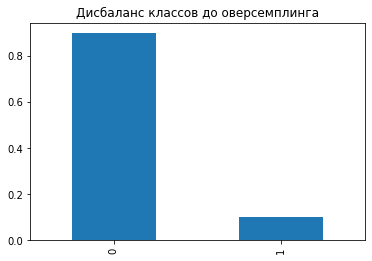

In [33]:
#Визуализация проблемы с дисбалансом и вычисления.
print('Процентное соотношение классов')
print(data['toxic'].value_counts(normalize=True))
data['toxic'].value_counts(normalize=True).plot(kind='bar')
plt.title('Дисбаланс классов до оверсемплинга');

#### Пайплайн и моделирование


- Пайплайн включает в себя и TF-IDF, RandomOverSampler и моделирование
- Дамми Классификатор представлен DummyClassifier(strategy = 'constant', constant = 1)
- Метрика на тестовой выборке считается только в конце, для лучшей модели 

In [43]:
data.isna().sum()

text_token_stopwords_lemm    25
toxic                         0
dtype: int64

In [44]:
data.dropna(inplace=True)

In [45]:
# Создание разбивки и указание констант
RANDOM_STATE=42
X, y = data['text_token_stopwords_lemm'], data['toxic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

In [46]:
#Создание пайплайна
from imblearn.pipeline import Pipeline

pipeline_new = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('sampler', RandomOverSampler(random_state=RANDOM_STATE)),
    ('models', DummyClassifier(strategy = 'constant', constant = 1)),
    ])


In [47]:
params_new=[
    # словарь для модели DecisionTreeClassifier()
    {
        "models": [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        "models__max_depth": range(2, 5),
    },
    # словарь для модели LogisticRegression()
    {
        "models": [
            LogisticRegression(
                random_state=RANDOM_STATE, max_iter=100
            )
        ],
        "models__C": range(4, 8), #регуляризация
    },
   
]

In [48]:
grid = GridSearchCV(
    pipeline_new, 
    cv=5, 
    n_jobs=-1, 
    param_grid=params_new, 
    scoring='f1',
    verbose=2
)


In [49]:
grid.fit(X_train, y_train)
print('Метрика на тестовых данных', grid.score(X_test, y_test))

print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)
print ('Метрика лучшей модели по кросс-валидации:', grid.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END models=DecisionTreeClassifier(random_state=42), models__max_depth=2; total time=   4.9s
[CV] END models=DecisionTreeClassifier(random_state=42), models__max_depth=2; total time=   5.0s
[CV] END models=DecisionTreeClassifier(random_state=42), models__max_depth=2; total time=   5.1s
[CV] END models=DecisionTreeClassifier(random_state=42), models__max_depth=2; total time=   5.0s
[CV] END models=DecisionTreeClassifier(random_state=42), models__max_depth=2; total time=   5.1s
[CV] END models=DecisionTreeClassifier(random_state=42), models__max_depth=3; total time=   5.7s
[CV] END models=DecisionTreeClassifier(random_state=42), models__max_depth=3; total time=   5.6s
[CV] END models=DecisionTreeClassifier(random_state=42), models__max_depth=3; total time=   5.5s
[CV] END models=DecisionTreeClassifier(random_state=42), models__max_depth=3; total time=   5.5s
[CV] END models=DecisionTreeClassifier(random_state=42), models__ma

In [50]:
y_test_pred = grid.predict(X_test)
f1 = f1_score(y_test, y_test_pred, pos_label=1)
print('F1-score test =', round(f1,2))

F1-score test = 0.77


- Все операции выполнены в пайплайне
- Лучшая модель и её параметры: LogisticRegression(C=5, random_state=42)
- Метрика лучшей модели по кросс-валидации: 0.7653615360729791
- Метрика на тестовых данных 0.7716921302969155 (опять получилась чуть больше, чем по кросс-валидации. Но всего пол процента.)
- Модель удовлетоворяет условия задачи.

## Выводы

Проект состоит из 3-х глав:
- Подготовка. Были импортированы библиотеки и данные. В целевом признаке два класса: 0 - положительные твиты, 1- отрицательные твиты. Текст был токенизирован, лемматизирован, были убраны стоп слова. Все сделано для английского языка, так как он превалирует в твитах. Далее текст преобразован в матрицу TF-IDF, которая отвечает за важность слов. Эти данные будут входным признаком для модели, которая определит токсичность твитов.
- Обучение. Так как выявлен дисбаланс классов (90/10), то сделан оверсемплинг.  Адекватность модели проверена сначала Dummy Классификатором, который показал плохой результат, что доказывает необходимость проведения моделирования.Метрика F1 чувствительна к дисбалансу классов, так как это среднее гармоническое precision и recall, поэтому она будет показывать низкое качество модели, если хотя бы одна из его составляющих даёт низкую оценку. Соответственно, логистическая регрессия с оверсемплингом показала хороший результат (0.76)
- Выводы. Лучшая модель по результатам исследований - LogisticRegression(C=5, random_state=42). Метрика лучшей модели по кросс-валидации: 0.7653615360729791. Метрика на тестовых данных 0.7716921302969155 (опять получилась чуть больше, чем по кросс-валидации. Но всего пол процента). Модель удовлетоворяет условия задачи. Соответственно, задача выполнена, в большинстве негативные твиты будут отслеживаться и удаляться.